<h1>Purpose of Project
<h2>: Predict suvival on the Titanic

<h1><u>Process</u>
<br>

<h3>0. Import data
<br>
<h3>1. Exploratory data analysis
    * Explore each data file structure
    *  Basic statistics visualization
<br>
<h3>2. Feature Engineering 
    * Data Cleansing
    * Select which feature should be included in model 
<br>
<h3>3. Modeling 
    * Logistic Regression
    * Support Vector Machine(SVM)
    * k-Nearest Neighbor(KNN)
    * Random Forest
    * Naive Bayes
<br>

<h3>4. Testing

<h1><b>0. Import Data</b>

In [408]:
import pandas as pd
import numpy as np

test = pd.read_csv("C:\\Users\\Joanna Kang\\Desktop\\python\\Kaggle\\titanic\\test.csv")
train = pd.read_csv("C:\\Users\\Joanna Kang\\Desktop\\python\\Kaggle\\titanic\\train.csv")

<h1><b>1.Exploratory data analysis</b>
<h3><br>(1) Check Data info 

In [409]:
train.head(80)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.00,0,0,348123,7.6500,F G73,S
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [410]:
test.head(80)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
75,967,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C
76,968,3,"Miles, Mr. Frank",male,NaN,0,0,359306,8.0500,NaN,S
77,969,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S
78,970,2,"Aldworth, Mr. Charles Augustus",male,30.0,0,0,248744,13.0000,NaN,S


<h3>(2) Check Missing Data

In [411]:
train.info()
#Age / Cabin info(=Cabin number) missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [412]:
test.info()
#Age / Cabin info(=Cabin number) missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<h3>(3)Visualization

In [413]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [414]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [415]:
# 파이차트

#def pie_cahrt(feature):
#     feature_ratio = train[feature].value_counts(sort=False)
#     feature_size = featrue_ration.size
#     feature_index = feature_ratio.index
#     survived = train[train['Survived']==1][feature].value_counts()
#     dead = train[train['Survived']==0][feature].value_counts()

# ​    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
# ​    plt.title(feature + '\'s ratio in total')
# ​    plt.show()

# ​    for i, index in enumerate(feature_index):
# ​        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
# ​        plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
# ​        plt.title(str(index) + '\'s ratio')

# ​    plt.show()


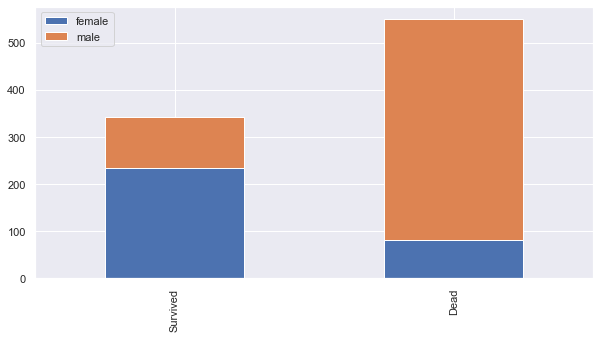

In [416]:
bar_chart('Sex')
#Chart illustrates that female tent to survived than male

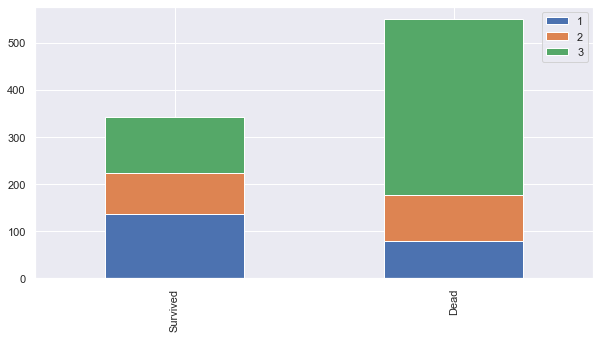

In [417]:
bar_chart('Pclass')
#Chart shows more 1st class passengers were survived than any other classes passengers
#3rd class passengers took highest proportions from the death toll

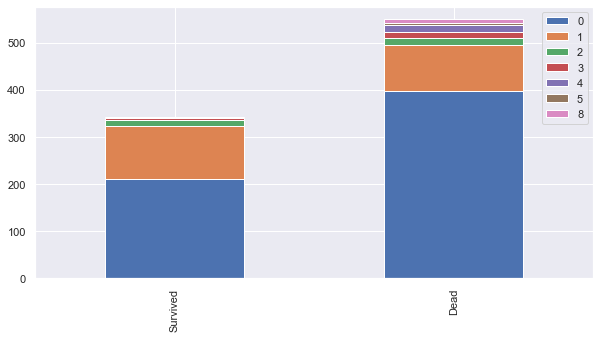

In [418]:
bar_chart('SibSp') # # of siblings / spouses aboard the Titanic

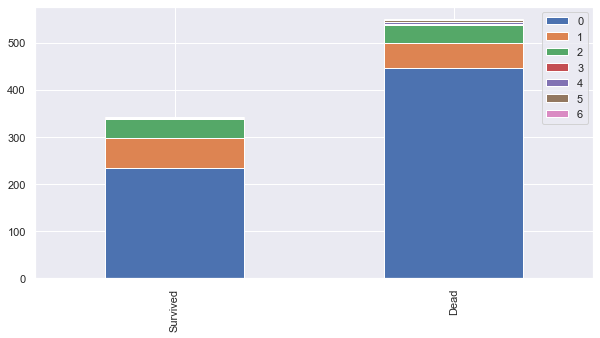

In [419]:
bar_chart('Parch') # # of parents / children aboard the Titanic

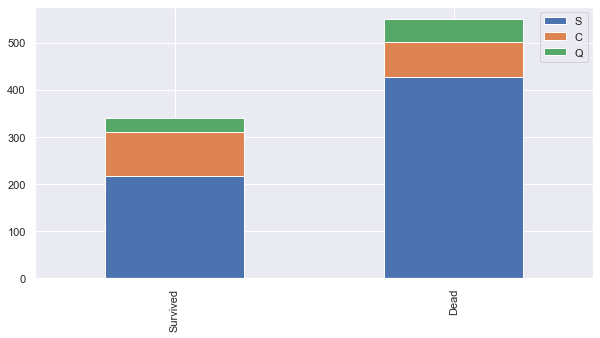

In [420]:
bar_chart('Embarked')

2. Feature Engineering
<br>To sum up Exploratory Analysis, Female & High class passengers & passengers who were accompanying family
 showed less death toll.

 <br>
 < Data preprocessing ><br>
 - Merge train & test data
 - Data cleansing
     - Name Feature : Extract 'Title' from names - Using regular expression / Unify similar title into 3 catogories -> Create dictionary: 0-Mr / 1-Miss / 2-Mrs / 3-others
     - Sex feature: convert to string Data
     - Embaked: Handle missing data - Replace 'NaN'elements<br>
        (*Ref: How to handle missing data: https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)
     - Age: Binning - Categorize continuous data into few scale(=string) groups (To reduce deviation scale) / Handle missing data - Replace 'Nan' into 'Mean' value of each age group
     - Fare: Handle missing data - Replace 'Nan' into an average of each Pclass' fare / Binning - into numeric data(=int) group
     - SibSp & Parch: Merge two feature into new "Family" feature
- Drop non-using features: Name, Ticket, Cabin, SibSp, Parch

(0) Merge Train & Test Data

In [421]:
train_test_data = [train, test] 
train_test_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

(1) Data cleansing - Name

In [422]:
for dataset in train_test_data:
    #dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand = False)
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.') #정규식: 대문자 A-Z로 시작하고 .로 끝나는 모든 문자열을 추출한다

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [423]:
#Count each each titles frequency
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Capt          1
Ms            1
Lady          1
Countess      1
Mme           1
Don           1
Jonkheer      1
Sir           1
Name: Title, dtype: int64

In [424]:
#Reshaping data using cross tabulation: Matching Title and Gender
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [425]:
#Create dictionary: 0-Mr / 1-Miss / 2-Mrs / 3-others
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Capt': 0, 'Col': 0, 'Countess': 3, 'Don': 0, 'Dr': 3, 'Jonkheer': 0, 'Lady': 3, 'Major': 0, 'Master': 0, 'Mlle': 3, 'Mme': 3, 'Ms': 2, 'Rev': 0, 'Sir': 0}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [426]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [427]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


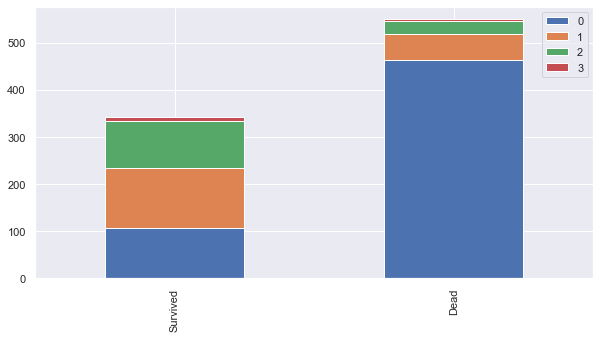

In [428]:
bar_chart('Title')

(2) Embaked: Handle missing data - Replace 'NaN'elements

In [429]:
#check 'Nan Value
train.isnull().sum()
#There are 2 missing Embarked value in train data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [430]:
test.isnull().sum()
#There is no missing data in test data

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            1
dtype: int64

In [431]:
#Fill Nan value in testset with 'S'

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].astype(str)    

In [432]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


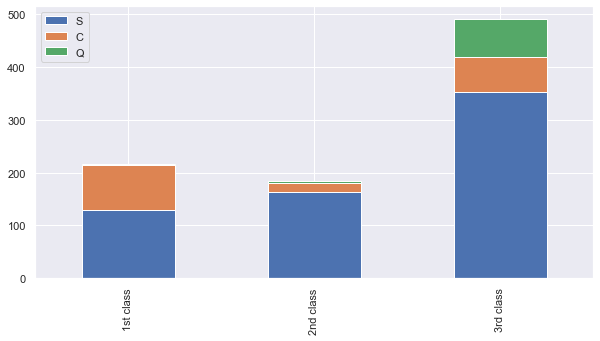

In [433]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

Most of the 3rd class passengers were on board from 'Q'
<br>It can be assumed that passengers aboard from 'Q' are more likely to die

(3) Age<br>
 - Check missing data <br>
 - Handle missing data - Replace 'Nan' into 'Mean' value of each age group <br>
 - Binning - Categorize continuous data into few scale(=string) groups (To reduce deviation scale)

In [434]:
#Chech the common characteristics of Nan data
age_nan_train = train[train['Age'].isnull()]
age_nan_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,2
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1


In [435]:
age_nan_test = test[test['Age'].isnull()]
age_nan_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S,0.0
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,2.0
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C,0.0
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2.0
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S,1.0


In [436]:
#Replace missing 'Age' data into each Title group's age median value
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace = True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace = True)

In [437]:
#Check if 'Nan' values have been replaced properly
print(train[train['Age'].isnull()])
print(test[test['Age'].isnull()])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title]
Index: []
Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title]
Index: []


In [438]:
#Median Age of Each Title
#0-Mr / 1-Miss / 2-Mrs / 3-others
Median_age = train['Age'].groupby(train['Title'])
Median_age
Median_age.median()

Title
0    29.0
1    21.0
2    35.0
3    33.0
Name: Age, dtype: float64

In [439]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

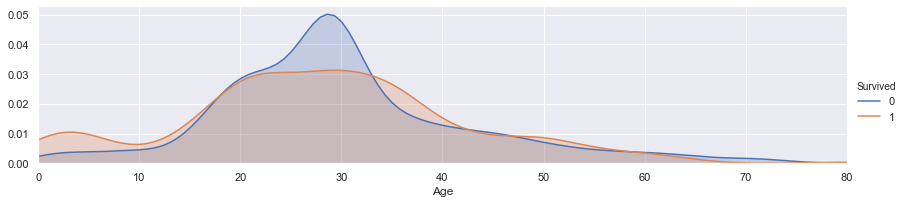

In [440]:
#Visualize Age distribution
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

In [441]:
def binning(feature, bins):
    feature_category = feature + '_category'
    for dataset in train_test_data:
        for i in range(len(bins)-1):
            dataset.loc[(dataset[feature] > bins[i]) & (dataset[feature] <= bins[i+1]), feature_category] = i
        dataset.loc[(dataset[feature] > bins[len(bins)-1]), feature_category] = len(bins) - 1


binning('Age', [0, 16, 32, 48, 64])


# for dataset in train_test_data:
#     dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
#     dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1,
#     dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2,
#     dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
#     dataset.loc[ dataset['Age'] > 62, 'Age'] = 4


In [442]:
train.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,29.0,0,0,374910,8.0500,NaN,S,0,1.0
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0,4.0
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C,0,1.0
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S,2,2.0


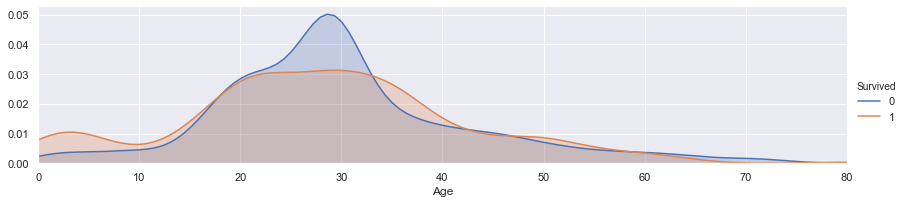

In [443]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

In [444]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2.0


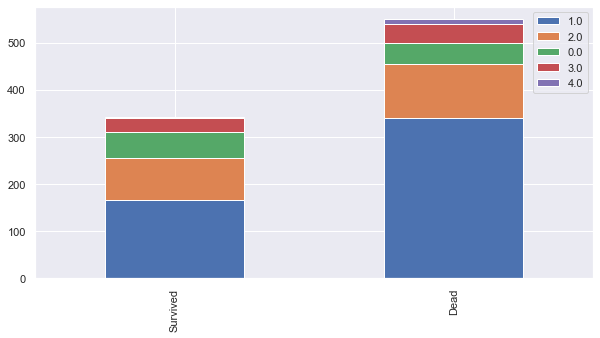

In [445]:
bar_chart('Age_category')

(4) Fare: Handle missing data - Replace 'Nan' into an average of each Pclass' fare / Binning - into numeric data(=int) group

In [446]:
#Replace missing 'Fare' data into each Class group's Fare median value
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace = True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace = True)

In [447]:
#Check if 'Nan' values have been replaced properly
print(test[test['Fare'].isnull()])
print(train[train['Fare'].isnull()])

Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title, Age_category]
Index: []
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title, Age_category]
Index: []


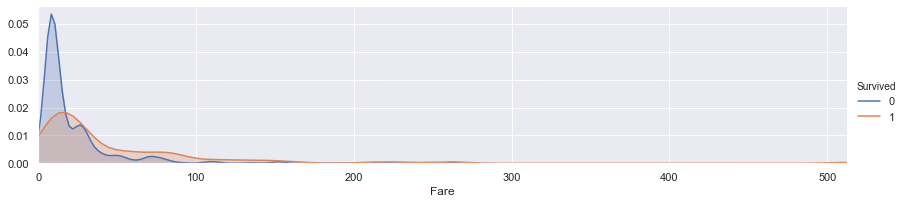

In [448]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

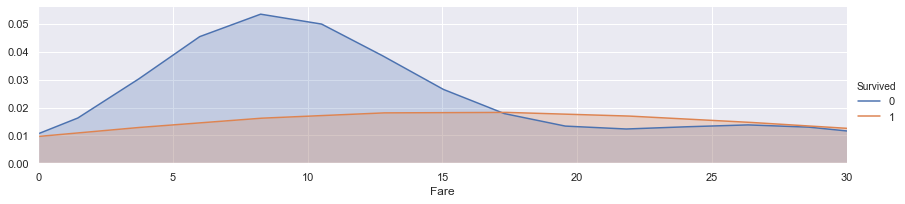

In [449]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)
 
plt.show()

In [450]:
#Binning Numerical Age to Categorical Variable
def binning(feature, bins):
    feature_category = feature + '_category'
    for dataset in train_test_data:
        for i in range(len(bins)-1):
            dataset.loc[(dataset[feature] > bins[i]) & (dataset[feature] <= bins[i+1]), feature_category] = i
        dataset.loc[(dataset[feature] > bins[len(bins)-1])] = len(bins)


binning('Fare', [0, 17, 30, 100])
train_test_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

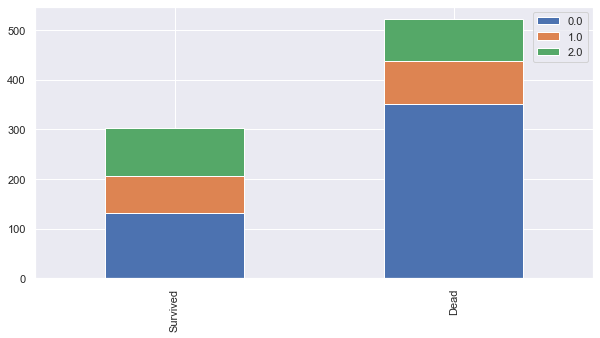

In [451]:
bar_chart('Fare_category')

In [452]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_category,Fare_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2.0,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2.0,0.0


In [453]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_category,Fare_category
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,2.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0,2.0,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,3.0,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,1.0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0,1.0,0.0


(5) SibSp & Parch: Merge two feature into new "Family" feature

In [454]:
for dataset in train_test_data:
    dataset['Family'] = dataset['Parch'] + dataset["SibSp"]
    dataset['Family'] = dataset['Family'].astype(int)

(6) Feature Drop

In [455]:
features_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch','Fare', 'Age']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

print(train.head())
print(test.head())

Survived  Pclass     Sex Embarked  Title  Age_category  Fare_category  \
0         0       3    male        S      0           1.0            0.0   
1         1       1  female        C      2           2.0            2.0   
2         1       3  female        S      1           1.0            0.0   
3         1       1  female        S      2           2.0            2.0   
4         0       3    male        S      0           2.0            0.0   

   Family  
0       1  
1       1  
2       0  
3       1  
4       0  
   PassengerId  Pclass     Sex Embarked  Title  Age_category  Fare_category  \
0          892       3    male        Q    0.0           2.0            0.0   
1          893       3  female        S    2.0           2.0            0.0   
2          894       2    male        Q    0.0           3.0            0.0   
3          895       3    male        S    0.0           1.0            0.0   
4          896       3  female        S    2.0           1.0            0.0   


In [456]:
train_data.shape, target.shape

((891, 9), (891,))